In [28]:
import sys
sys.dont_write_bytecode = True

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from lib.colors import equalize
from lib.utils import imshow
from lib.misc import generate_histogram

import contextlib
with contextlib.redirect_stdout(None):
    np.seterr(divide='ignore', invalid='ignore')

%matplotlib inline

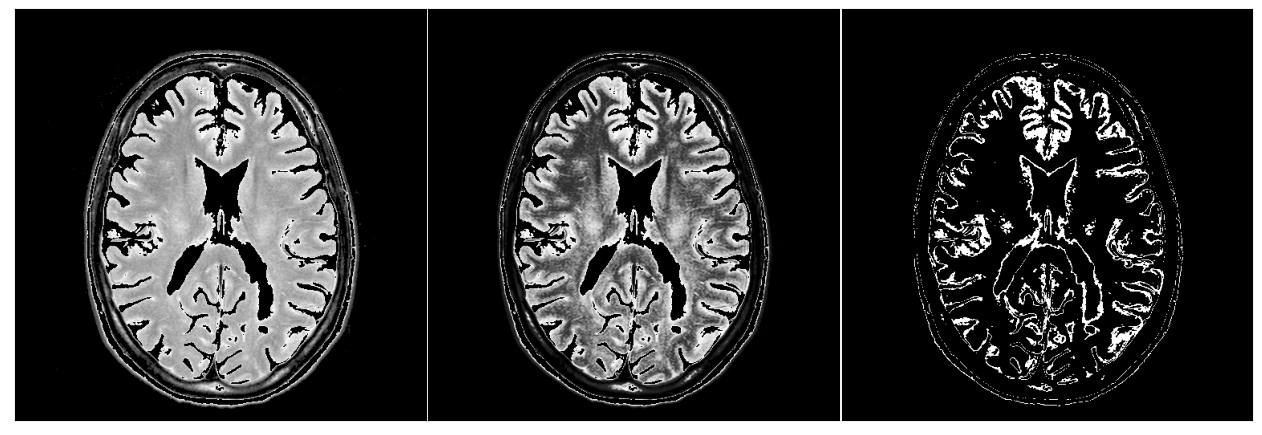

In [56]:
%matplotlib inline

image = cv.imread('./images/Initial & repeat MRI in MS-Free Dataset/AA/1/IM_00037.TIF')
im_gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
im_gray[im_gray< 20] = 0
im_gray[im_gray > 120] = 0
equalized = equalize(im_gray, levels=150)

tmp = np.zeros(im_gray.shape).astype('uint8')
tmp[equalized > 120] = 255

imshow(im_gray, equalized, tmp)

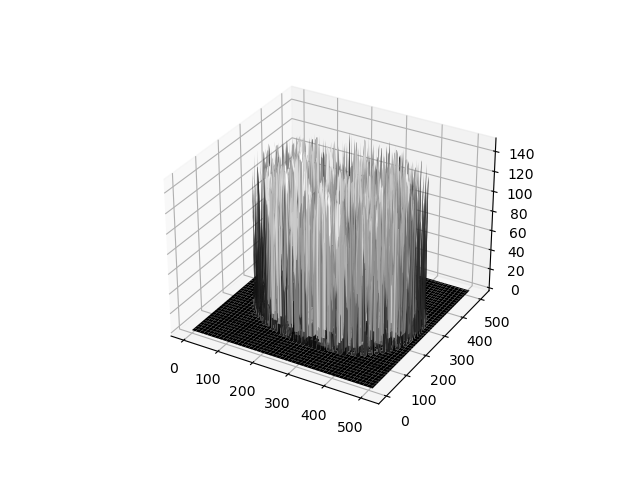

In [57]:
%matplotlib widget
x, y = np.mgrid[0:im_gray.shape[0], 0:im_gray.shape[1]]
fig1 = plt.figure()
ax = fig1.add_subplot(projection = '3d')
ax.grid(True)
# ax = fig1.add_subplot(2, 1, 1)
# ax.plot_surface(x, y, im_gray, cmap = 'gray')
# ax = fig1.add_subplot(2, 1, 2)
ax.plot_surface(x, y, equalized, cmap = 'gray')
plt.show()